In [1]:
import serde.csv, pandas as pd
from tum.config import CRITICAL_MAAS_DIR, PROJECT_DIR
from pathlib import Path
from tum.actors.entry import *
from sm.namespaces.utils import KGName
from sm.dataset import Dataset
from hugedict.chained_mapping import ChainedMapping
from dsl.dsl import DSL, DSLTable
from sm.outputs.semantic_model import SemanticType
from sm.prelude import I, O
from sm.dataset import Example
from tum.sm.dsl.main import (
    get_semantic_types,
    gen_can_graph,
    pred_sm,
    get_training_data,
)

## Generate candidate graph

In [2]:
actor = G.create_actor(
    DBActor,
    [
        DBActorArgs(
            kgdbs=[
                KGDBArgs(
                    name=KGName.Generic,
                    version="20231130",
                    datadir=CRITICAL_MAAS_DIR / "data/minmod/databases/",
                )
            ]
        ),
        DataActorArgs(skip_unk_ont_ent=True, skip_no_sm=True),
        MinmodGraphGenerationActorArgs(
            train_dsquery="darpa-criticalmaas",
            meta_prop_file=CRITICAL_MAAS_DIR
            / "ta2-table-understanding/data/meta_property/data.csv",
            top_n_stypes=2,
        ),
        MinmodGraphInferenceActorArgs(),
    ],
)

2024-09-04 03:46:27.096 | DEBUG    | ream.actor_graph:create_actor:274 - Determine the actor to run...
2024-09-04 03:46:27.097 | DEBUG    | ream.actor_graph:create_actor:276 - Initializing argument parser...
2024-09-04 03:46:27.098 | DEBUG    | ream.actor_graph:create_actor:296 - Constructing the actor...


In [3]:
kgdb = actor.kgdbs[KGName.Generic]

In [4]:
kgns = kgdb.kgns

In [5]:
db = kgdb.pydb

classes = {}
classes.update(db.get_default_classes())
classes = ChainedMapping(db.classes.cache(), classes)

props = {}
props.update(db.get_default_props())
props = ChainedMapping(db.props.cache(), props)

In [6]:
examples = get_training_data("dsl-semtype", kgns)

In [7]:
import random

random.seed(26)
random.shuffle(examples)

In [8]:
examples

[Example(id='site_latitude--1', sms=[<sm.outputs.semantic_model.SemanticModel object at 0x31a3e7610>], table=DSLTable(table=<sm.inputs.table.ColumnBasedTable object at 0x31a3f1200>, columns=[DSLColumn(id='site_latitude--1:0:latdd', table_id='site_latitude--1', col_index=0, col_name='latdd', type=<ColumnType.STRING: 'string'>, type_stats={<ColumnType.NUMBER: 'number'>: 0.0, <ColumnType.STRING: 'string'>: 1.0, <ColumnType.DATETIME: 'datetime'>: 0.0, <ColumnType.NULL: 'null'>: 0.0}, size=2, num_array=[], num_idx_array=[], str_array=['lat\n\n32.14027778\n32.24166667\n32.92222222\n33.825\n32.92222222\n33.09583333\n22.06666667\n24.60833333\n22.53333333\n20.83055556\n-30.36666667\n-30.81666667\n-31.7\n-32.46666667\n-27.63333333\n-33.16666667', 'latitude\n\n32.14027778\n32.24166667\n32.92222222\n33.825\n32.92222222\n33.09583333\n22.06666667\n24.60833333\n22.53333333\n20.83055556\n-30.36666667\n-30.81666667\n-31.7\n-32.46666667\n-27.63333333\n-33.16666667'], str_idx_array=[0, 1])])),
 Example(i

In [9]:
dsl = DSL(
    examples,
    CRITICAL_MAAS_DIR / "data/minmod/models",
    classes,
    props,
)
dsl.get_model(
    train_if_not_exist=True,
    save_train_data=True,
)

2024-09-04 03:46:27.314 | INFO     | sm.misc.ray_helper:ray_init:52 - Initialize ray with args: {'log_to_driver': False}
2024-09-04 03:46:29,126	INFO worker.py:1781 -- Started a local Ray instance.


Compute similarity matrix:   0%|          | 0/24 [00:00<?, ?it/s]

2024-09-04 03:46:32.215 | DEBUG    | dsl.dsl:train_model:120 - Performance:
2024-09-04 03:46:32.226 | DEBUG    | dsl.dsl:train_model:134 - Save model...


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00        48

    accuracy                           1.00       552
   macro avg       1.00      1.00      1.00       552
weighted avg       1.00      1.00      1.00       552



RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=120)

In [10]:
test_tbl = I.ColumnBasedTable.from_dataframe(
    pd.read_csv(CRITICAL_MAAS_DIR / "sources/tungsten/World_Tin_Tungsten_Deposit.csv"),
    "World_Tin_Tungsten_Deposit",
)

In [24]:
stypes = get_semantic_types(dsl, test_tbl, top_n=1)

KeyboardInterrupt: 

In [12]:
stypes

[[SemanticTypePrediction(stype=SType(mos:MineralSite--mos:latitude), score=0.0, col_index=0, col_name='deposit_no')],
 [SemanticTypePrediction(stype=SType(mos:MineralSite--mos:latitude), score=0.0, col_index=1, col_name='deposit_name')],
 [SemanticTypePrediction(stype=SType(mos:MineralSite--mos:country), score=0.105, col_index=2, col_name='country')],
 [SemanticTypePrediction(stype=SType(mos:MineralSite--mos:latitude), score=0.0, col_index=3, col_name='longdd')],
 [SemanticTypePrediction(stype=SType(mos:MineralSite--mos:latitude), score=0.0, col_index=4, col_name='latdd')],
 [SemanticTypePrediction(stype=SType(mos:MineralInventory--mos:tonnage), score=0.105, col_index=5, col_name='tonnage')],
 [SemanticTypePrediction(stype=SType(mos:MineralInventory--mos:tonnage_unit), score=0.23, col_index=6, col_name='tonnage_unit')],
 [SemanticTypePrediction(stype=SType(mos:MineralInventory--mos:category), score=0.105, col_index=7, col_name='category')],
 [SemanticTypePrediction(stype=SType(mos:Mine

In [13]:
cg = gen_can_graph(stypes, kgns)

2024-09-04 03:46:33.663 | INFO     | tum.sm.dsl.main:gen_can_graph:106 - Candidate Graph with: 16 nodes and 15 edges


In [14]:
pd.DataFrame(
    [
        {
            "source": kgns.get_rel_uri(e.source),
            "target": (
                e.target
                if not e.target.startswith("http")
                else kgns.get_rel_uri(e.target)
            ),
            "key": kgns.get_rel_uri(e.key),
            "score": e.score,
        }
        for e in cg.edges()
    ]
)

,source,target,key,score
0,mos:MineralSite:0,mos:MineralInventory:0,mos:mineral_inventory,1.000
1,mos:MineralSite:0,col:0,mos:latitude,0.000
2,mos:MineralSite:0,col:1,mos:latitude,0.000
3,mos:MineralSite:0,col:2,mos:country,0.105
4,mos:MineralSite:0,col:3,mos:latitude,0.000
5,mos:MineralSite:0,col:4,mos:latitude,0.000
6,mos:MineralInventory:0,col:5,mos:tonnage,0.105
7,mos:MineralInventory:0,col:6,mos:tonnage_unit,0.230
8,mos:MineralInventory:0,col:7,mos:category,0.105
9,mos:MineralInventory:0,col:8,mos:commodity,0.105


In [15]:
pred_sm(test_tbl, cg, kgns).print()


00.	[0] mos:MineralSite
01.	├── ─[1: mos:country]→ [2] country (column 2)
02.	├── ─[0: mos:mineral_inventory]→ [1] mos:MineralInventory
03.	│   ├── ─[4: mos:category]→ [5] category (column 7)
04.	│   ├── ─[5: mos:commodity]→ [6] commodity (column 8)
05.	│   ├── ─[6: mos:grade]→ [7] grade (column 9)
06.	│   ├── ─[7: mos:grade_unit]→ [8] grade_unit (column 10)
07.	│   ├── ─[8: mos:grade_unit]→ [9] cutoff_grade_unit (column 12)
08.	│   ├── ─[2: mos:tonnage]→ [3] tonnage (column 5)
09.	│   ├── ─[3: mos:tonnage_unit]→ [4] tonnage_unit (column 6)



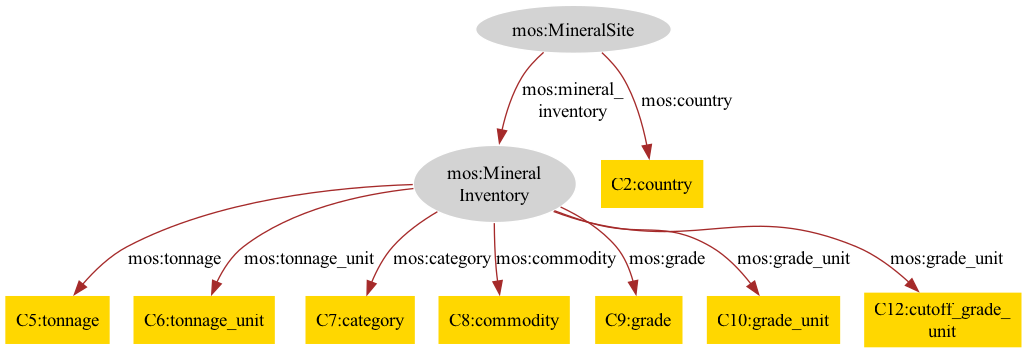

In [16]:
pred_sm(test_tbl, cg, kgns).draw()

In [17]:
from tum.integrations.sand import *


class GramsMinModAssistant:
    def __init__(
        self,
        dbpath: Path,
        entities,
        classes,
        props,
    ):
        self.entities = entities
        self.classes = classes
        self.props = props

        from sm.namespaces.utils import KGName
        from tum.actors.entry import (
            DataActorArgs,
            DBActorArgs,
            G,
            KGDBArgs,
            MinmodGraphGenerationActorArgs,
            MinmodGraphInferenceActorArgs,
            MinmodTableTransformationActor,
        )
        from tum.config import CRITICAL_MAAS_DIR

        self.meta_prop_file = (
            CRITICAL_MAAS_DIR / "ta2-table-understanding/data/meta_property/data.csv"
        )

        self.actor = G.create_actor(
            MinmodTableTransformationActor,
            [
                DBActorArgs(
                    kgdbs=[
                        KGDBArgs(
                            name=KGName.Generic,
                            version="20231130",
                            datadir=dbpath,
                        )
                    ]
                ),
                DataActorArgs(skip_unk_ont_ent=True, skip_no_sm=True),
                MinmodGraphGenerationActorArgs(
                    train_dsquery="dsl-semtype",
                    meta_prop_file=self.meta_prop_file,
                    top_n_stypes=2,
                ),
                MinmodGraphInferenceActorArgs(),
            ],
        )

    def predict(self, table: Table, rows: list[TableRow]):
        full_table = self.convert_table(table, rows)
        sm = self.actor.graphinfer_actor(full_table)
        rows = copy.deepcopy(rows)
        return sm, rows

    def convert_table(self, table: Table, rows: list[TableRow]) -> FullTable:
        newtbl = I.ColumnBasedTable(
            f"p{table.project_id}---t:{table.id}---{table.name}",
            columns=[
                I.Column(index=ci, name=col, values=[row.row[ci] for row in rows])
                for ci, col in enumerate(table.columns)
            ],
        )
        links = M.Matrix.default(newtbl.shape(), list)
        return FullTable(
            table=newtbl,
            context=I.Context(),
            links=links,
        )


assistant = GramsMinModAssistant(
    CRITICAL_MAAS_DIR / "data/minmod/databases/", kgdb.pydb.entities, classes, props
)

2024-09-04 03:46:34.336 | DEBUG    | ream.actor_graph:create_actor:274 - Determine the actor to run...
2024-09-04 03:46:34.336 | DEBUG    | ream.actor_graph:create_actor:276 - Initializing argument parser...
2024-09-04 03:46:34.337 | DEBUG    | ream.actor_graph:create_actor:296 - Constructing the actor...


In [18]:
import tum.sm.dsl.main as dsl_main

In [19]:
full_table = FullTable(
    table=test_tbl,
    context=I.Context(),
    links=M.Matrix.default(test_tbl.shape(), list),
)
sm = assistant.actor.graphinfer_actor(full_table)

2024-09-04 03:46:34.389 | DEBUG    | MinmodGraphGenerationActor:ream.actors.base:get_working_fs:98 - Using working directory: /Users/rook/workspace/darpa-criticalmaas/data/ream/MinmodGraphGenerationActor/v110/001
2024-09-04 03:46:34.765 | DEBUG    | dsl.dsl:get_model:87 - Load previous trained model...
2024-09-04 03:46:35.258 | INFO     | tum.sm.dsl.main:gen_can_graph:106 - Candidate Graph with: 16 nodes and 29 edges


In [20]:
dsl2 = assistant.actor.graphinfer_actor.cangraph_actor.get_dsl()

In [21]:
ex_stypes = dsl_main.get_semantic_types(dsl2, test_tbl, top_n=1)

In [22]:
ex_stypes

[[SemanticTypePrediction(stype=SType(mos:MineralSite--mos:latitude), score=0.0, col_index=0, col_name='deposit_no')],
 [SemanticTypePrediction(stype=SType(mos:MineralSite--mos:latitude), score=0.0, col_index=1, col_name='deposit_name')],
 [SemanticTypePrediction(stype=SType(mos:MineralSite--mos:country), score=0.105, col_index=2, col_name='country')],
 [SemanticTypePrediction(stype=SType(mos:MineralSite--mos:latitude), score=0.0, col_index=3, col_name='longdd')],
 [SemanticTypePrediction(stype=SType(mos:MineralSite--mos:latitude), score=0.0, col_index=4, col_name='latdd')],
 [SemanticTypePrediction(stype=SType(mos:MineralInventory--mos:tonnage), score=0.105, col_index=5, col_name='tonnage')],
 [SemanticTypePrediction(stype=SType(mos:MineralInventory--mos:tonnage_unit), score=0.23, col_index=6, col_name='tonnage_unit')],
 [SemanticTypePrediction(stype=SType(mos:MineralInventory--mos:category), score=0.105, col_index=7, col_name='category')],
 [SemanticTypePrediction(stype=SType(mos:Mine

In [23]:
sm.print()


00.	[0] mos:MineralSite
01.	├── ─[1: mos:country]→ [2] country (column 2)
02.	├── ─[0: mos:mineral_inventory]→ [1] mos:MineralInventory
03.	│   ├── ─[4: mos:category]→ [5] category (column 7)
04.	│   ├── ─[5: mos:commodity]→ [6] commodity (column 8)
05.	│   ├── ─[6: mos:grade]→ [7] grade (column 9)
06.	│   ├── ─[7: mos:grade_unit]→ [8] grade_unit (column 10)
07.	│   ├── ─[8: mos:grade_unit]→ [9] cutoff_grade_unit (column 12)
08.	│   ├── ─[2: mos:tonnage]→ [3] tonnage (column 5)
09.	│   ├── ─[3: mos:tonnage_unit]→ [4] tonnage_unit (column 6)

